### Naive_bayes Theorem for text using multinomialNB

In [46]:
import pandas as pd
import math as m
from matplotlib import pyplot as plt
import seaborn as sns 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [48]:
df=pd.read_csv('spam.csv')

In [49]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [50]:
df.shape

(5572, 2)

In [54]:
df['Category'].unique()

array(['ham', 'spam'], dtype=object)

In [56]:
df['Category']=df['Category'].apply(lambda x: 'not spam' if x=='ham' else 'spam')

In [58]:
df.head()

,Category,Message
0,not spam,"Go until jurong point, crazy.. Available only ..."
1,not spam,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,not spam,U dun say so early hor... U c already then say...
4,not spam,"Nah I don't think he goes to usf, he lives aro..."


In [104]:
df['Category'].unique()
df['Message'].dtype

dtype('O')

### Feature Engineering for message column using countvectorizer featuring technique

In [74]:
from sklearn.feature_extraction.text import CountVectorizer


In [125]:
X=df['Message']
y=df['Category']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
X_train[:1]

1978    Reply to win £100 weekly! Where will the 2006 ...
Name: Message, dtype: object

In [127]:
V=CountVectorizer()

In [129]:
X_train_featured=V.fit_transform(X_train)
X_test_featured=V.transform(X_test)

In [134]:
len(X_train_featured.toarray()[1])

7701

### Model Evaluation and Training : MultinomialNB

In [152]:
from sklearn.naive_bayes import MultinomialNB

In [154]:
model=MultinomialNB()
model.fit(X_train_featured,y_train)
y_pred=model.predict(X_test_featured)
report=classification_report(y_test,y_pred)
cm=confusion_matrix(y_test,y_pred)
print(report)
cm

              precision    recall  f1-score   support

    not spam       0.99      1.00      1.00       966
        spam       1.00      0.94      0.97       149

    accuracy                           0.99      1115
   macro avg       1.00      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



array([[966,   0],
       [  9, 140]], dtype=int64)

In [158]:
df['Category'].unique()

array(['not spam', 'spam'], dtype=object)

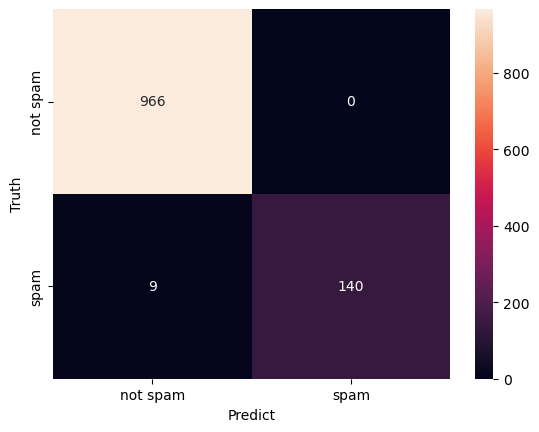

In [160]:
sns.heatmap(cm,xticklabels=df['Category'].unique(),yticklabels=df['Category'].unique(),annot=True,fmt='d')
plt.xlabel('Predict')
plt.ylabel('Truth')
plt.show()

### Testing more emails

In [169]:
emails=['hurry up!,20% discount, exlusive offer',
       'Hey Rohan, How are you']
email_featured=V.transform(emails)
model.predict(email_featured)

array(['spam', 'not spam'], dtype='<U8')